In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

with open("./log/sel.pickle", "rb") as f:
    sel = pickle.load(f)

with open("./log/imp.pickle", "rb") as f:
    imp = pickle.load(f)

In [5]:
len(sel[0])

64

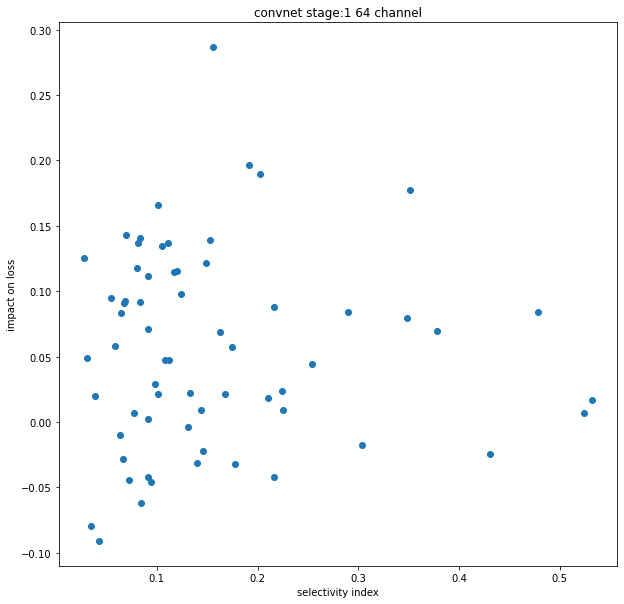

In [33]:
plt.title("convnet stage:1 64 channel")
plt.xlabel("selectivity index")
plt.ylabel("impact on loss")
plt.scatter(sel[0], np.array(imp[0])- 28.41573366522789)
plt.show()

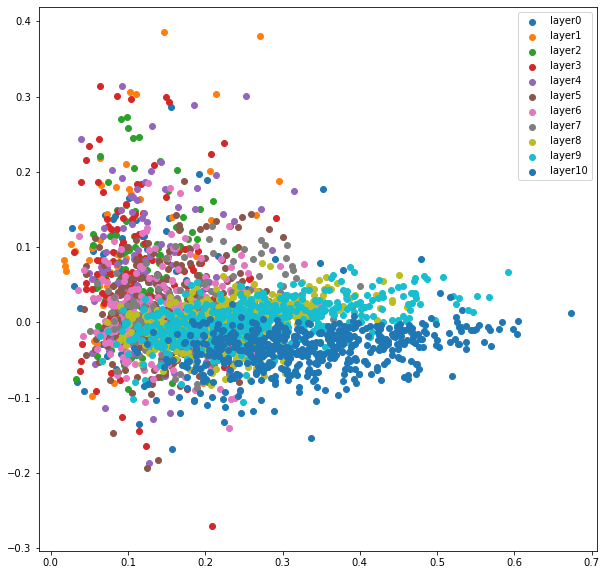

In [15]:
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(len(sel)):
    plt.scatter(sel[i], np.array(imp[i]) - 28.41573366522789, label='layer{}'.format(i))
plt.legend()
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

corr_list = []
for i in range(len(imp)):
    fit = LinearRegression().fit(np.array(sel[i]).reshape([-1, 1]), np.array(imp[i]).reshape([-1, 1]))
    corr_list.append(fit.coef_[0, 0])

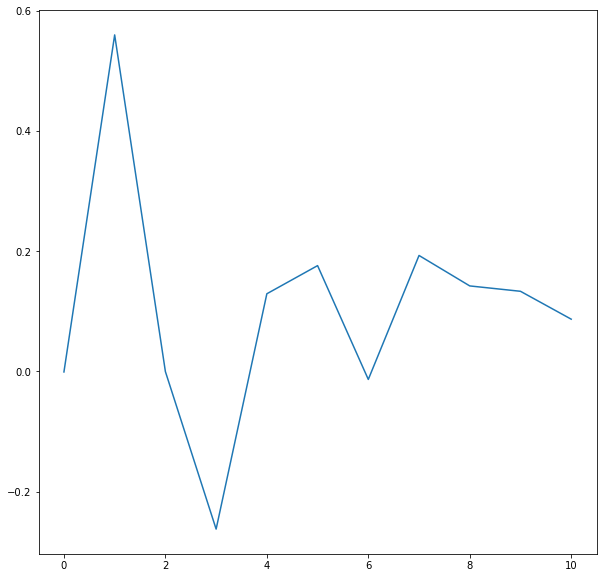

In [29]:
plt.plot(corr_list)

In [27]:
corr_list

[array([[-0.00080827]], dtype=float32),
 array([[0.56013036]], dtype=float32),
 array([[-0.00020393]], dtype=float32),
 array([[-0.26234886]], dtype=float32),
 array([[0.12929243]], dtype=float32),
 array([[0.17614952]], dtype=float32),
 array([[-0.01325605]], dtype=float32),
 array([[0.19304866]], dtype=float32),
 array([[0.14236085]], dtype=float32),
 array([[0.13342494]], dtype=float32),
 array([[0.08701723]], dtype=float32)]

In [31]:
6952 / 10000 * 256

177.9712